In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches


np.random.seed(40)


def generate_mock_data(num_tasks=10, num_robots=5):
    task_drtn = np.random.randint(1, 11, size=num_tasks)
    task_prt = np.random.randint(1, 6, size=num_tasks)
    robot_efficiencies = [0.01,0.002,0.30,0.40]
    return task_drtn, task_prt, robot_efficiencies

In [10]:
def fitness_function(population, task_drtn, task_prt, robot_efficiencies):
    fitness =[]
    total_robot = len(robot_efficiencies)
    for i in range(len(population)):
        present_population = population[i]
        Tr = np.zeros(total_robot, dtype=int)
        for j in range(len(present_population)):
            task = j
            robot = present_population[task]
            Task = task_durations[task]
            priority = task_priorities[task]
            effen = robot_efficiencies[robot]
            Tr[robot] = Tr[robot] + ((Task * priority) / effen)
        Ttotal = np.max(Tr)
        B = np.std(Tr)
        fitness.append(1/(Ttotal + B))
    return fitness

In [11]:
def select_parents(population, fitness):
    num_parents = int(len(population)/2)
    parents = []

    for _ in range(num_parents):
        max_fitness_idx = np.argmax(fitness)
        parents.append(population[max_fitness_idx])
        fitness[max_fitness_idx] = -np.inf
    return parents

In [12]:
def crossover(parents, num_offspring):
    # Single point crossover
    offspring = []
    for _ in range(num_offspring):
        crossover_point = np.random.randint(1, len(parents[0]))
        parent1_idx = np.random.randint(0, len(parents))
        parent2_idx = np.random.randint(0, len(parents))
        offspring_part1 = parents[parent1_idx][0:crossover_point]
        offspring_part2 = parents[parent2_idx][crossover_point:]
        offspring2_part1 = parents[parent2_idx][0:crossover_point]
        offspring2_part2 = parents[parent1_idx][crossover_point:]
        offspring.append(np.concatenate((offspring_part1, offspring_part2)))
        offspring.append(np.concatenate((offspring2_part1, offspring2_part2)))

    return offspring

In [13]:
def mutation(offspring, mutation_rate, robot_efficiencies):
    # Mutation changes a single value in each offspring randomly.
    for idx in range(len(offspring)):
        for _ in range(int(len(offspring[idx])*mutation_rate)):
            First_num = np.random.randint(0, len(offspring[idx]))
            Second_num = np.random.randint(0, len(offspring[idx]))
            offspring[idx][First_num], offspring[idx][Second_num] = offspring[idx][Second_num] , offspring[idx][First_num] #Two values swap
    return offspring

In [14]:
# GA algorithm placeholder
def run_genetic_algorithm(task_drtn, task_prt, robot_efficiencies):
    population_size = 50
    generation = 100
    mutation_rate = 0.1

    # Placeholder for the initial population generation
    population = [np.random.randint(0, len(robot_efficiencies), size=len(task_drtn)) for _ in range(population_size)]
    for _ in range(generation):
        fitness = fitness_function(population, task_drtn, task_prt, robot_efficiencies)
        parents = select_parents(population, fitness)
        offspring = crossover(parents, int(population_size / 2 ))
        population = mutation(offspring, mutation_rate, robot_efficiencies)
    best_solution = population[np.argmax(fitness)]

    return best_solution

In [15]:
def visualize_assignments_improved(solution, task_drtn, task_prt, robot_efficiencies):
    # Create a grid for visualization based on the solution provided
    grid = np.zeros((len(robot_efficiencies), len(task_drtn)))
    for task_idx, robot_idx in enumerate(solution):
        grid[robot_idx, task_idx] = task_drtn[task_idx]

    fig, ax = plt.subplots(figsize=(12, 6))
    cmap = mcolors.LinearSegmentedColormap.from_list("", ["white", "blue"])

    # Display the grid with task durations
    cax = ax.matshow(grid, cmap=cmap)
    fig.colorbar(cax, label='Task Duration (hours)')

    # Annotate each cell with task priority and duration
    for i in range(len(task_drtn)):
        for j in range(len(robot_efficiencies)):
            text_color = 'white' if grid[j, i] > 0 and task_drtn[i] >= 5 else 'black'
            ax.text(i, j, f'P{task_prt[i]}\n{task_drtn[i]}H', va='center', ha='center', color=text_color)


    # Set the ticks and labels for tasks and robots
    ax.set_xticks(np.arange(len(task_durations)))
    ax.set_yticks(np.arange(len(robot_efficiencies)))
    ax.set_xticklabels([f'Task {i+1}' for i in range(len(task_drtn))], rotation=45, ha="left")
    ax.set_yticklabels([f'Robot {i+1} (Efficiency: {eff:.2f})' for i, eff in enumerate(robot_efficiencies)])

    plt.xlabel('Tasks')
    plt.ylabel('Robots')
    plt.title('Task Assignments with Task Duration and Priority')

    # Create a legend for task priorities
    priority_patches = [mpatches.Patch(color='white', label=f'Priority {i}') for i in range(1, 6)]
    plt.legend(handles=priority_patches, bbox_to_anchor=(1.20, 1), loc='upper left', title="Task Priorities")

    plt.tight_layout()
    plt.show()

Best Solution: [4 5 5 3 5 1 5 1 5 4]


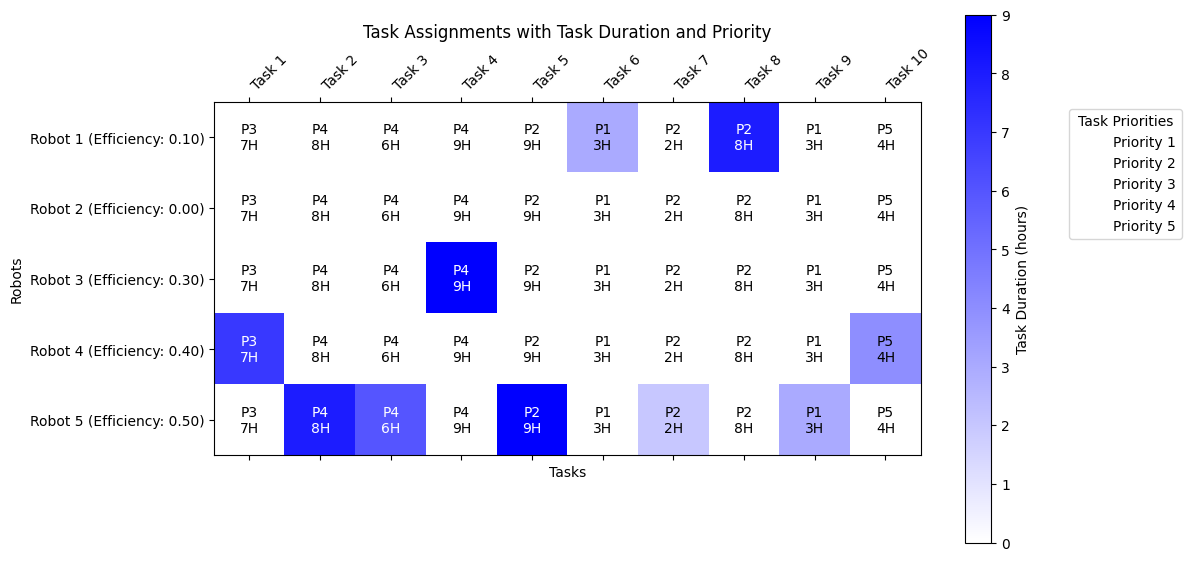

In [16]:
# Main Controlling Function
if __name__ == "__main__":
    num_tasks = 10
    num_robots = 5
    task_drtn, task_prt, robot_efficiencies = generate_mock_data(num_tasks, num_robots)

    # Run GA to find the best solution
    best_solution = run_genetic_algorithm(task_drtn, task_prt, robot_efficiencies)
    print("Best Solution:",best_solution+1)

    # Visualize the initial random assignment
    visualize_assignments_improved(best_solution, task_drtn, task_prt, robot_efficiencies)